<a href="https://colab.research.google.com/github/michaelawe01/Bournemouth-Uni-Data-Science-/blob/main/02_Intro_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

[NumPy](https://numpy.org/) is the **fundamental** package for scientific computing with Python. It contains among other things:
- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- useful linear algebra, Fourier transform, and random number capabilities

NumPy can be thought of as core functionality of [MATLAB](https://www.mathworks.com/products/matlab.html) ported to Python. Many other useful libraries build on top of NumPy.

If somebody says that know Python, it's almost always also implied that they know NumPy. Python without libraries like NumPy doesn't have much to offer.

In [ ]:
import numpy as np  # by convention numpy is imported as 'np'

# Arrays

NumPy’s main object is the **homogeneous** multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of ~non-negative~ integers. In NumPy dimensions are called _axes_.

Deep learning libraries use _tensors_ and a _tensor_ is simply a multidimensional array, with some extra bells and whistles like ability to live on a GPU or support for automatic differentiation.

Generalisation of 1d (vector) and 2d (matrix) into multiple dimensions, in the _tensor_ world referred to as rank-1, rank-2, rank-3 etc. _tensors_.

Note, that the fundamental linear algebra operations like matrix product do not generalise into 3 and more dimensions, and hence only operate on a single 2d _face_ of a higher rank _tensor_.

In [ ]:
a = np.array([1, 2, 3])   # initilise an array with a list
print(type(a))
print(a.shape)            # neither a row or a column vector!
print(a[0], a[1], a[2])   # basic indexing works like in the list
a[0] = 5
print(a)

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]


In [ ]:
b = np.array([[1, 2, 3], [4, 5, 6]])  # 2d array (initialised with a list of lists), has to be rectangular!
print(b.shape)                        # (rows, columns)
print(b)
print(b[0,0], b[0,1], b[1,0])         # need two number to index into the array now (row, column)

(2, 3)
[[1 2 3]
 [4 5 6]]
1 2 4


In [ ]:
b[1] # would this work?

array([4, 5, 6])

## Convenience functions for array initialisation

In [ ]:
a = np.zeros((2,3))
print(a)

[[0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
b = np.ones((1,2))
print(b)

[[1. 1.]]


In [ ]:
c = np.full((2,2), 7)
print(c)

[[7 7]
 [7 7]]


In [ ]:
d = np.eye(4) # I
print(d)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
e = np.random.random((3,3))
print(e)

[[0.09834683 0.42110763 0.95788953]
 [0.53316528 0.69187711 0.31551563]
 [0.68650093 0.83462567 0.01828828]]


## Array indexing

In [ ]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(a)
print(a[0,1])   # it's always row,column (unlike computer graphics!)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
2


In [ ]:
b = a[:2, 1:3]  # which rows and columns will this return?
print(b)

[[2 3]
 [6 7]]


In [ ]:
b[0,0] = 77    # b is merely a *view/reference* on a!
print(a)

[[ 1 77  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [ ]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
row_r1 = a[1, :]    # get the 1st row
row_r2 = a[1:2, :]  # get rows between 1st and 2nd...?
print(row_r1, row_r1.shape)  # row vector or column vector?
print(row_r2, row_r2.shape)  # how come the shapes are not the same?? <wb>

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


In [ ]:
# the same behaviour with columns
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]])
print(a)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
# paired indexing with two iterables (like lists)
print(a[[0, 1, 2],
        [0, 1, 0]])

[1 4 5]


In [ ]:
# equivalent but messy and not flexible - what if you wanted to index 1mln rows?
print(np.array((a[0,0], a[1,1], a[2,0])))

[1 4 5]


In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
b = np.array([0, 2, 0, 1])
print(a[range(4), b])   # plug in a range object - for each row we extract a value from a differnt column
list(range(4)), b       # this is what the actual indexes look like

[ 1  6  7 11]


([0, 1, 2, 3], array([0, 2, 0, 1]))

In [ ]:
a[np.arange(4), b] += 10   # this indexing can be used to modify values in an array as well
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]])
mask = (a > 2)    # boolean indexing
print(mask)

[[False False]
 [ True  True]
 [ True  True]]


In [ ]:
print(a[mask])

[3 4 5 6]


In [ ]:
print(a[a > 2])

[3 4 5 6]


The dots `...` represent as many colons as needed to produce a complete indexing tuple. If `x` is an array with 5 axes/dimensions, then:
- `x[1,2,...]` is equivalent to `x[1,2,:,:,:]`
- `x[...,3]` to `x[:,:,:,:,3]`
- `x[4,...,5,:]` to `x[4,:,:,5,:]`

Super useful when working with high dimensional _tensors_ like a batch of videos.

In [ ]:
x = np.random.randn(3,5,7,9,11)
x.shape

(3, 5, 7, 9, 11)

In [ ]:
print(x[...,1].shape)      # indexing along the last axis/dimension
print(x[:,:,:,:,1].shape)  # equivalent

(3, 5, 7, 9)
(3, 5, 7, 9)


In [ ]:
x[...,1:2].shape

(3, 5, 7, 9, 1)

In [ ]:
x[...,1].shape

(3, 5, 7, 9)

In [ ]:
x[...,1,None].shape  # None adds empty axis, equivalent to np.newaxis

(3, 5, 7, 9, 1)

In [ ]:
np.all(x[...,2,:] == x[:,:,:,2,:])

True

## Datatypes

Data types are normally inferred, but could be specified explicitly, too. Every `array` has them.

In [ ]:
x = np.array([1, 2])
print(x.dtype)  # what is the data type here?

int64


In [ ]:
x = np.array([1.0, 2.0])
print(x.dtype)  # not a type used by NNs, too slow and memory intensive, such high precision is not needed

float64


In [ ]:
x = np.array([1, 2.])
print(x.dtype)

float64


In [ ]:
x = np.array([1.0, 2.0], dtype=np.int64)  # dtype can be specified in most array creation functions
print(x.dtype)

int64


## Changing the shape of an array

Data often doesn't come in the shape we want it. MNIST dataset is a good example, 28x28 pixel images, typically flattened to 28x28=768 dimensions.

In [ ]:
np.random.seed(1)
a = np.floor(10*np.random.random((3,4)))
a

array([[4., 7., 0., 3.],
       [1., 0., 1., 3.],
       [3., 5., 4., 6.]])

NumPy stores arrays in [row-major](https://en.wikipedia.org/wiki/Row-_and_column-major_order) order.

In [ ]:
a.ravel()   # flatten the array - returns a view

array([4., 7., 0., 3., 1., 0., 1., 3., 3., 5., 4., 6.])

In [ ]:
a.flatten() # flatten the array - returns a copy, the same as `a.ravel().copy()`

array([4., 7., 0., 3., 1., 0., 1., 3., 3., 5., 4., 6.])

In [ ]:
a.reshape(6,2)  # can specify any shape as long as there's space to store all the elements

array([[4., 7.],
       [0., 3.],
       [1., 0.],
       [1., 3.],
       [3., 5.],
       [4., 6.]])

In [ ]:
a.reshape(-1,2,2)  # the dimension with "-1" will be worked out automatically

array([[[4., 7.],
        [0., 3.]],

       [[1., 0.],
        [1., 3.]],

       [[3., 5.],
        [4., 6.]]])

In [ ]:
a.reshape(6,2).T  # transpose

array([[4., 0., 1., 1., 3., 4.],
       [7., 3., 0., 3., 5., 6.]])

## Array math

In [ ]:
x = np.array([[1, 2], [3, 4]], dtype=np.float64)
y = np.array([[5, 6], [7, 8]], dtype=np.float64)

In [ ]:
print(x + y)  # with a single "+" operation we add two sets of 4 numbers each!

[[ 6.  8.]
 [10. 12.]]


We avoid loops this way, which makes the code much much faster!

In [ ]:
print(np.add(x, y))   # "+" is an overloaded operator, when Python sees two NumPy arrays involved in addition, it will call `np.add()`

[[ 6.  8.]
 [10. 12.]]


In [ ]:
print(x - y)

[[-4. -4.]
 [-4. -4.]]


In [ ]:
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]


In [ ]:
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [ ]:
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [ ]:
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


In [ ]:
x = np.array([[1, 2, 3], [ 4,  5,  6]])
y = np.array([[7, 8, 9], [10, 11, 12]])

v = np.array([ 9, 10, 11])
w = np.array([12, 13, 14])

In [ ]:
# three notations which do exactly the same thing
print(v.dot(w))
print(np.dot(v, w))
print(v @ w)

392
392
392


Dot product is **the** operation that neural networks rely on. Even the largest networks with billions of paramaters really just do a lot of dot products (with some extras like non-linear activation functions).  

If your dot product is a bit rusty, check out this [interactive dot product visualisation](http://matrixmultiplication.xyz/).

In [ ]:
x.shape, v.shape  # you can't just multiply any arbitrary matrices together - their shapes must be compatible

((2, 3), (3,))

In [ ]:
x @ v   # are these two shapes compatible?

array([ 62, 152])

In [ ]:
x.shape, y.argmax(axis=0).shape

((2, 3), (3,))

In [ ]:
x @ y  # what about these two?

array([[ 50,  68],
       [122, 167]])

In [ ]:
# aggregate operations
x = np.array([[1, 2], [3, 4]])
print(np.sum(x))
print(np.sum(x, axis=0))
print(np.sum(x, axis=0).shape)
print(np.sum(x, axis=1, keepdims=True))   # does not remove the unit axis
print(np.sum(x, axis=1, keepdims=True).shape)   # does not remove the unit axis

10
[4 6]
(2,)
[[3]
 [7]]
(2, 1)


## Broadcasting

In [ ]:
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
x

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
x + 2  # how is it even possible - the shapes don't match! single line -> 12 addition operations! <wb>

array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [ ]:
y = np.array([1, 0, 1])
x.shape, y.shape

((4, 3), (3,))

In [ ]:
x + y  # <wb>

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

[__Broadcasting rules__](https://numpy.org/devdocs/user/basics.broadcasting.html)

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions and works its way forward. Two dimensions are compatible when:
- they are equal, or
- one of them is `1`

In [ ]:
x.shape, y.shape

((4, 3), (3,))

In [ ]:
np.broadcast_to(y, x.shape)

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]])

In [ ]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))

In [ ]:
z

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [ ]:
x.shape, y.shape  # can these two be added with broadcasting?

((4,), (5,))

In [ ]:
x + y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

In [ ]:
xx.shape, y.shape  # can these two be added with broadcasting?

((4, 1), (5,))

In [ ]:
xx + y  # notice that these are two vectors (1d)! <wb>

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

In [ ]:
x.shape, z.shape  # can these two be added with broadcasting?

((4,), (3, 4))

In [ ]:
(x + z).shape

(3, 4)

In [ ]:
x = np.array([[1,2,3], [4,5,6], [7,8,9]])
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
y = np.array([-1,-2,-3])
y

array([-1, -2, -3])

In [ ]:
x.shape, y.shape  # these two can be added in two different ways?! <wb>

((3, 3), (3,))

In [ ]:
x + y

array([[0, 0, 0],
       [3, 3, 3],
       [6, 6, 6]])

In [ ]:
x.shape, y.shape

((3, 3), (3,))

In [ ]:
y[None, :].shape, y[:, None].shape  # how are these two different?

((1, 3), (3, 1))

In [ ]:
x + y[None, :]

array([[0, 0, 0],
       [3, 3, 3],
       [6, 6, 6]])

In [ ]:
x + y[:, None]

array([[0, 1, 2],
       [2, 3, 4],
       [4, 5, 6]])

## Can't we do the same with loops?

In [ ]:
x = np.random.random((1000,100))
x[:5,:5]

array([[0.20445225, 0.87811744, 0.02738759, 0.67046751, 0.4173048 ],
       [0.93259546, 0.69681816, 0.06600017, 0.75546305, 0.75387619],
       [0.17395567, 0.12632952, 0.13507916, 0.50566217, 0.02152481],
       [0.25711829, 0.1108913 , 0.19296273, 0.49958417, 0.72858567],
       [0.80296324, 0.6968005 , 0.76621138, 0.34245412, 0.84585148]])

In [ ]:
y = np.random.random(100)
y.shape

(100,)

In [ ]:
z = x * y
z.shape

(1000, 100)

How fast is it with broadcasting?

In [ ]:
%timeit -n100 x * y  # µ = micro = 10**(-6)

125 µs ± 26.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


What about without broadcasting? Is the difference even worth talking about?

In [ ]:
o = x.copy()
%timeit -n100 for i in range(o.shape[0]): o[i] += y

1.54 ms ± 650 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


- Basic Linear Algebra Subprograms - [BLAS](https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms)
- Single instruction, multiple data - [SIMD](https://en.wikipedia.org/wiki/SIMD)

Python loops (no NumPy at all):

In [ ]:
%%timeit -n10

o = x.copy()
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        o[i,j] += y[j]

47.4 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# SciPy

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python.

## Distance between points

In [ ]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

x = np.array([[0, 1], [1, 0], [2, 0]])
print(x)

[[0 1]
 [1 0]
 [2 0]]


In [ ]:
d1 = pdist(x, 'euclidean')
print(d1)

[1.41421356 2.23606798 1.        ]


In [ ]:
d2 = squareform(pdist(x, 'euclidean'))
print(d2)

[[0.         1.41421356 2.23606798]
 [1.41421356 0.         1.        ]
 [2.23606798 1.         0.        ]]


# Matplotlib and Seaborn


## Plotting

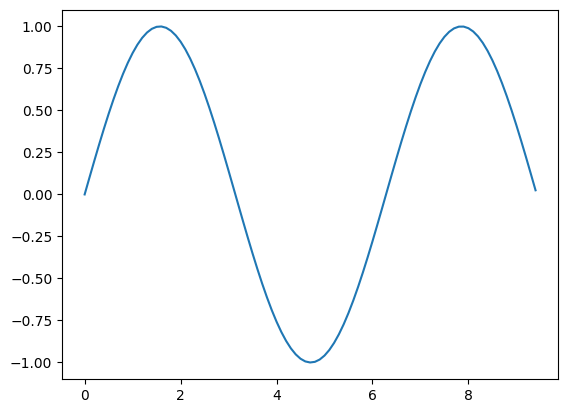

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

plt.plot(x, y)
plt.show()

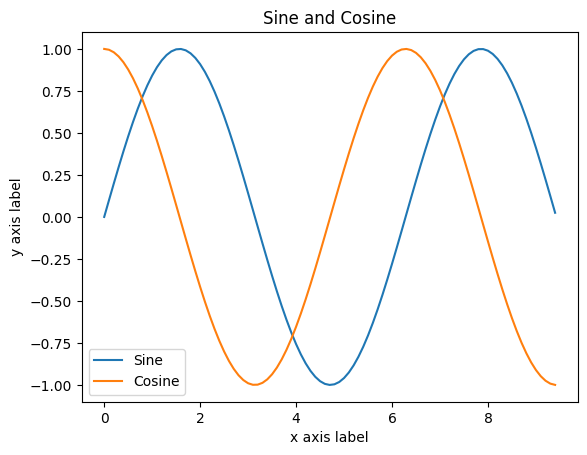

In [ ]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

## Subplots

Subplots very useful in Notebooks.

In [ ]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

Text(0.5, 1.0, 'Cosine')

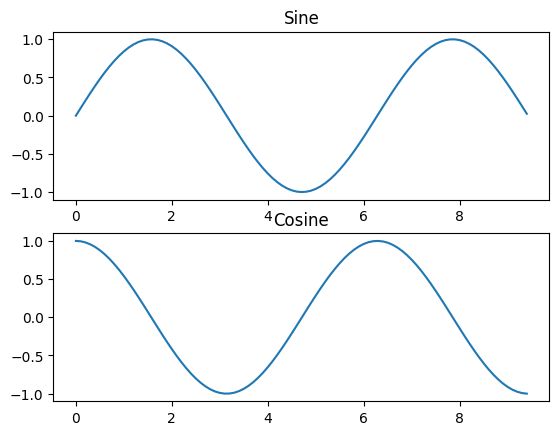

In [ ]:
fig, ax = plt.subplots(2,1)

ax[0].plot(x, y_sin)
ax[0].set_title('Sine')

ax[1].plot(x, y_cos)
ax[1].set_title('Cosine')

## Seaborn

In [ ]:
import seaborn as sns

In [ ]:
tips = sns.load_dataset('tips')

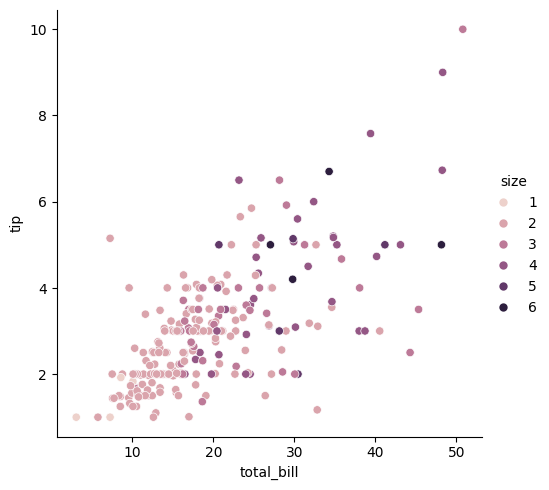

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

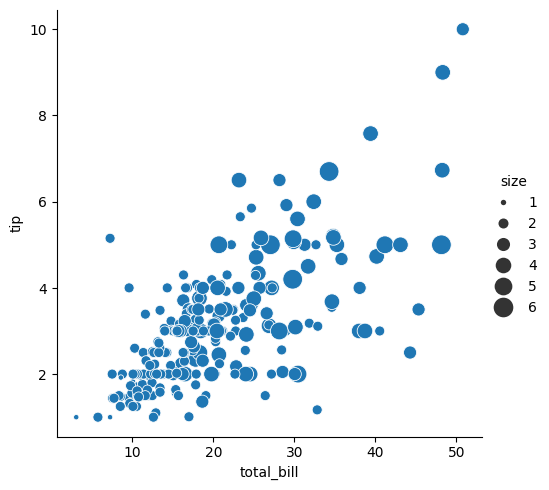

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

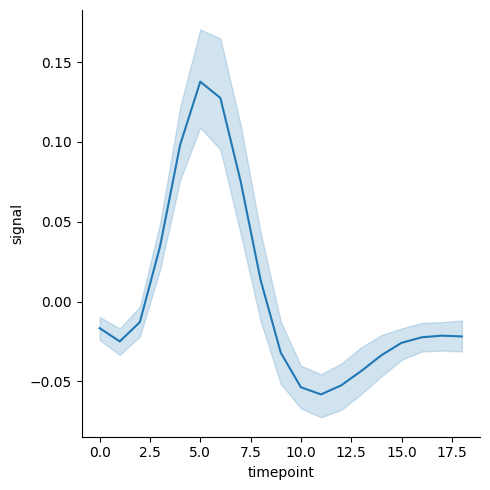

In [ ]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

Seaborn example [gallery](https://seaborn.pydata.org/examples/index.html). There are other good plotting libraries like [bokeh](https://docs.bokeh.org/en/latest/docs/gallery.html) or [plotly](https://plot.ly/).